**Exploratory Data Analysis**

**Roles To Explore:**


In [2]:
# Install libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


**Filter For Data Analyst Roles**


In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

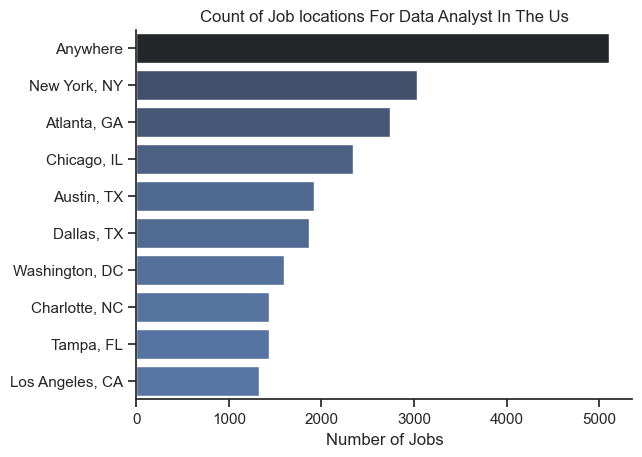

In [4]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job locations For Data Analyst In The Us')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

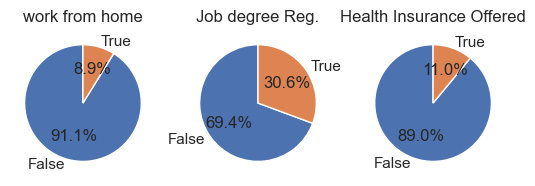

In [5]:

dict_column = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job degree Reg.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False', 'True']
)
    ax[i].set_title(title)

plt.show()

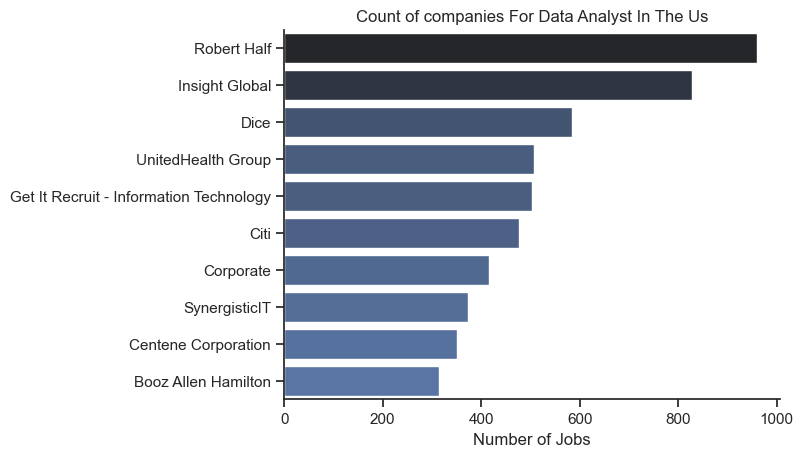

In [6]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of companies For Data Analyst In The Us')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()